## ANIMALHACK 2024
### Ethical Implications and Primary Purposes of Wildlife Trade
#### Sam Utzinger

Animal trading for commercial, scientific, educational, and personal use has existed and made money for humans for thousands of years. The first bartering and trade systems were created by wildlife trade. Prehistoric people traded fish, poultry, and meat for other forms of food that others hunted or gathered. As humans expanded and became the dominant species on Earth, trading wildlife needed some rules and laws to govern it. Trading specific animals led to the extinction of some species, and because of this, hunting laws and conservation efforts have been put in place. Animals can't survive overfarming, hunting, and environmental loss. Science caught up with the effects of what the wildlife trade did to the environment, and a protected and endangered animals list was created. The IUCN - The World Conservation Union created the CITES appendices for animals. It works by subjecting international trade in specimens of selected species to certain controls. Animals are given three different classes: Appendix I means the animal is threatened with extinction, to Appendix III, which includes species that are protected in at least one country.

The CITES (Convention on International Trade in Endangered Species of Wild Fauna and Flora) Wildlife Trade Database is publicly available on Kaggle.

### Cleaning

These next steps are for loading and viewing the database. I need to engineer some data columns and change some others to match this project better. I wanted to look at the highest import and export and what the animals' classification looked like.

#### Process

Step 1: Get rid of all plants in the dataset.

Step 2: I needed to change the term column to purpose.

Step 3: Find the country names from country codes.

Step 4: Convert taxon into common names.


In [138]:
import csv
import pandas as pd
import seaborn as sns
import pycountry



filepath= "/Users/samut/OneDrive/Desktop/comptab_2018-01-29 16_00_comma_separated.csv"

df = pd.read_csv(filepath)
df

plant_keywords = [
    'Magnoliopsida', 'Pinopsida', 'Liliopsida', 'Cactaceae',  # Example classes and families
    'Rosaceae', 'Poaceae', 'Asteraceae', 'Cactaceae',          # Example families
    'Quercus', 'Pinus', 'Rosa', 'Opuntia'                      # Example genera
]

# Filter out the rows where any of these plant-related keywords are in the Class, Order, Family, or Genus
df = df[
    ~df['Class'].isin(plant_keywords) &
    ~df['Order'].isin(plant_keywords) &
    ~df['Family'].isin(plant_keywords) &
    ~df['Genus'].isin(plant_keywords) &
    ~df['Taxon'].isin(plant_keywords)
]

purpose_mapping = {
    "B": "Breeding",
    "E": "Educational",
    "G": "Garden",
    "H": "Hunting",
    "L": "Law",
    "M": "Medical",
    "R": "Reintroduction to wild",
    "P": "Personal",
    "Q": "Circus",
    "S": "Scientific",
    "T": "Commercial",
    "Z": "Zoo"
}

# Apply the mapping to the 'Purpose' column
df['Purpose'] = df['Purpose'].map(purpose_mapping).fillna("Unknown")
# reset the index

df.reset_index(drop=True, inplace=True)

#change the country code to country name

def get_country_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except:
        return 'Unknown country code'
    
df['Exporter'] = df['Exporter'].apply(get_country_name)
df['Importer'] = df['Importer'].apply(get_country_name)

#drop some unused columns
df.drop(['Origin', 'Source'], axis=1, inplace=True) 

#make some colums


df


,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,Türkiye,Netherlands,NaN,1.0,bodies,NaN,Commercial
1,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,Unknown country code,Serbia,NaN,1.0,bodies,NaN,Circus
2,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,Belgium,Norway,NaN,43.0,feathers,NaN,Scientific
3,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,Belgium,Norway,NaN,43.0,specimens,NaN,Scientific
4,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,Denmark,Iceland,700.0,NaN,specimens,NaN,Scientific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62288,2017,III,Canis aureus,Mammalia,Carnivora,Canidae,Canis,United States,Ethiopia,NaN,7.0,trophies,NaN,Hunting
62289,2017,III,Sarcoramphus papa,Aves,Falconiformes,Cathartidae,Sarcoramphus,Japan,Peru,NaN,2.0,live,NaN,Commercial
62290,2017,III,Daboia russelii,Reptilia,Serpentes,Viperidae,Daboia,Serbia,Italy,200.0,NaN,specimens,NaN,Commercial
62291,2017,III,Civettictis civetta,Mammalia,Carnivora,Viverridae,Civettictis,France,Ethiopia,NaN,635.1,musk,kg,Commercial


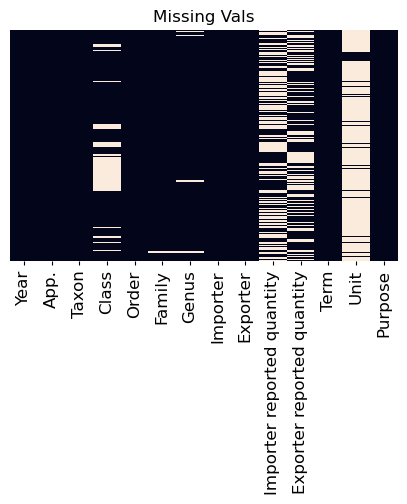

In [139]:
import matplotlib.pyplot as plt

f,ax=plt.subplots(figsize= (5,3))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
kwargs = {'length':3,'labelsize':12,'rotation':90}
ax.tick_params(**kwargs)
ax.set_title('Missing Vals')
plt.show()

### Code Runtime: 2 Hours 

This is code that gets the common name for each animal based on the taxon. The code works off an API and is very slow. You can run the code, and it prints out the names it finds as it goes, but the entire runtime on my computer was 118 minutes. I will be using this with only the US animals for a more reasonable size.

In [133]:
from pyinaturalist import get_taxa

#make test names:

#if you want to run the code with the common names, you can use the following code
#animal_test_names =  df[['Taxon']]


#get ride or duplicates 
animal_test_names = animal_test_names.drop_duplicates().reset_index(drop=True)


common_names_list = []

#this code works but takes 2 hours to fully run on my computer
# it uses an api to access the common names of the animals in the dataset. Sometimes the api trows me an error and i have to run the code again
# i will be continuing with out the common names due to a time constraint i have for this project. 
for index, row in animal_test_names.iterrows():
    taxon_name = row['Taxon']
    response = get_taxa(q=taxon_name, rank='species')
    if response['results']:
        common_name = response['results'][0].get('preferred_common_name', 'No common name found')
        common_names_list.append(common_name)
        common_names_list.append(taxon_name)
        print(index, common_name, taxon_name)
    else:
        common_names_list.append('No results found')


0 Imperial Eagle Aquila heliaca
1 White-tailed Eagle Haliaeetus albicilla
2 Harpy Eagle Harpia harpyja
3 Shortnose Sturgeon Acipenser brevirostrum
4 European Sea Sturgeon Acipenser sturio
5 Red Panda Ailurus fulgens
6 Chinese Alligator Alligator sinensis
7 Black Caiman Melanosuchus niger
8 Laysan Duck Anas laysanensis
9 White-winged Duck Asarcornis scutulata


KeyboardInterrupt: 

### Code Runtime: 2 mins

same thing but only for the US

In [140]:
from pyinaturalist import get_taxa

# Filter the DataFrame for animals sold in the US under App. I and where the term is 'live'
df_us = df[(df['Importer'] == 'United States') & (df['App.'] == 'I') & (df['Term'] == 'live')]

# Get the unique taxon names
unique_taxons = df_us['Taxon'].drop_duplicates().reset_index(drop=True)

# Initialize an empty DataFrame to store taxon and common names
taxon_common_names = pd.DataFrame(columns=['Taxon', 'Common Name'])

# List to store dictionaries for each row
rows = []

# Iterate over unique taxons and fetch common names
for index, taxon_name in unique_taxons.items():
    response = get_taxa(q=taxon_name, rank='species')
    if response['results']:
        common_name = response['results'][0].get('preferred_common_name', 'No common name found')
    else:
        common_name = 'No results found'
    
    # Add each result as a dictionary to the list
    rows.append({'Taxon': taxon_name, 'Common Name': common_name})
    print(index, common_name, taxon_name)

# Convert the list of dictionaries to a DataFrame
taxon_common_names = pd.DataFrame(rows)

# Merge the common names back with the original DataFrame
df_us = pd.merge(df_us, taxon_common_names, on='Taxon', how='left')

# Display or save the updated DataFrame
df_us

0 Red Panda Ailurus fulgens
1 Black Caiman Melanosuchus niger
2 Tanimbar Corella Cacatua goffiniana
3 Salmon-crested Cockatoo Cacatua moluccensis
4 Yellow-crested Cockatoo Cacatua sulphurea
5 Andean Condor Vultur gryphus
6 Lion-tailed Macaque Macaca silenus
7 Mandrill Mandrillus sphinx
8 Southern Pudú Pudu puda
9 Green Sea Turtle Caretta caretta
10 Green Sea Turtle Chelonia mydas
11 Philippine Crocodile Crocodylus mindorensis
12 False Gharial Tomistoma schlegelii
13 Savanna Elephant Loxodonta africana
14 No common name found Euphorbia francoisii
15 No common name found Euphorbia tulearensis
16 No results found Falco hybrid
17 Peregrine Falcon Falco peregrinus
18 No results found Falco peregrinus anatum
19 Gyrfalcon Falco rusticolus
20 Cheetah Acinonyx jubatus
21 Jaguar Panthera onca
22 Leopard Panthera pardus
23 Tiger Panthera tigris
24 Jaguar Uncia uncia
25 Gharial Gavialis gangeticus
26 Sumatran Orangutan Pongo abelii
27 Northern White-cheeked Gibbon Nomascus leucogenys
28 Rhinoceros

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Common Name
0,2016,I,Ailurus fulgens,Mammalia,Carnivora,Ailuridae,Ailurus,United States,Canada,5.0,NaN,live,NaN,Zoo,Red Panda
1,2016,I,Melanosuchus niger,Reptilia,Crocodylia,Alligatoridae,Melanosuchus,United States,Denmark,10.0,NaN,live,NaN,Zoo,Black Caiman
2,2016,I,Cacatua goffiniana,Aves,Psittaciformes,Cacatuidae,Cacatua,United States,Germany,1.0,NaN,live,NaN,Personal,Tanimbar Corella
3,2016,I,Cacatua moluccensis,Aves,Psittaciformes,Cacatuidae,Cacatua,United States,Bahamas,NaN,1.0,live,NaN,Circus,Salmon-crested Cockatoo
4,2016,I,Cacatua moluccensis,Aves,Psittaciformes,Cacatuidae,Cacatua,United States,Canada,1.0,NaN,live,NaN,Personal,Salmon-crested Cockatoo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2016,I,Encephalartos middelburgensis,NaN,Cycadales,Zamiaceae,Encephalartos,United States,South Africa,3.0,NaN,live,NaN,Commercial,Middelburg Cycad
275,2016,I,Encephalartos natalensis,NaN,Cycadales,Zamiaceae,Encephalartos,United States,South Africa,1.0,NaN,live,NaN,Commercial,Natal Giant Cycad
276,2016,I,Encephalartos princeps,NaN,Cycadales,Zamiaceae,Encephalartos,United States,South Africa,10.0,NaN,live,NaN,Commercial,Kei Cycad
277,2016,I,Encephalartos sclavoi,NaN,Cycadales,Zamiaceae,Encephalartos,United States,South Africa,50.0,NaN,live,NaN,Commercial,No common name found


# EDA

The next six graphs are all representations of the imports and exports.

1st graph: Shows just the top countries in imports and exports.

2nd graph: This shows the amount of different species the top countries import and export. The separation in the bar graph is the appendix group they are a part of, with 1 meaning they are the most endangered.

3rd graph: This graph is only a little different than the second and the same as the first, but it shows the proportional amounts of the quantity of the animals coming in. This isn’t the amount of live animals, just the quantity of items shipped. It shows that there are fewer Class 1 animals coming in than the first graph shows because it displays quantity. It could be an example of regulation working because the quantity is limited.


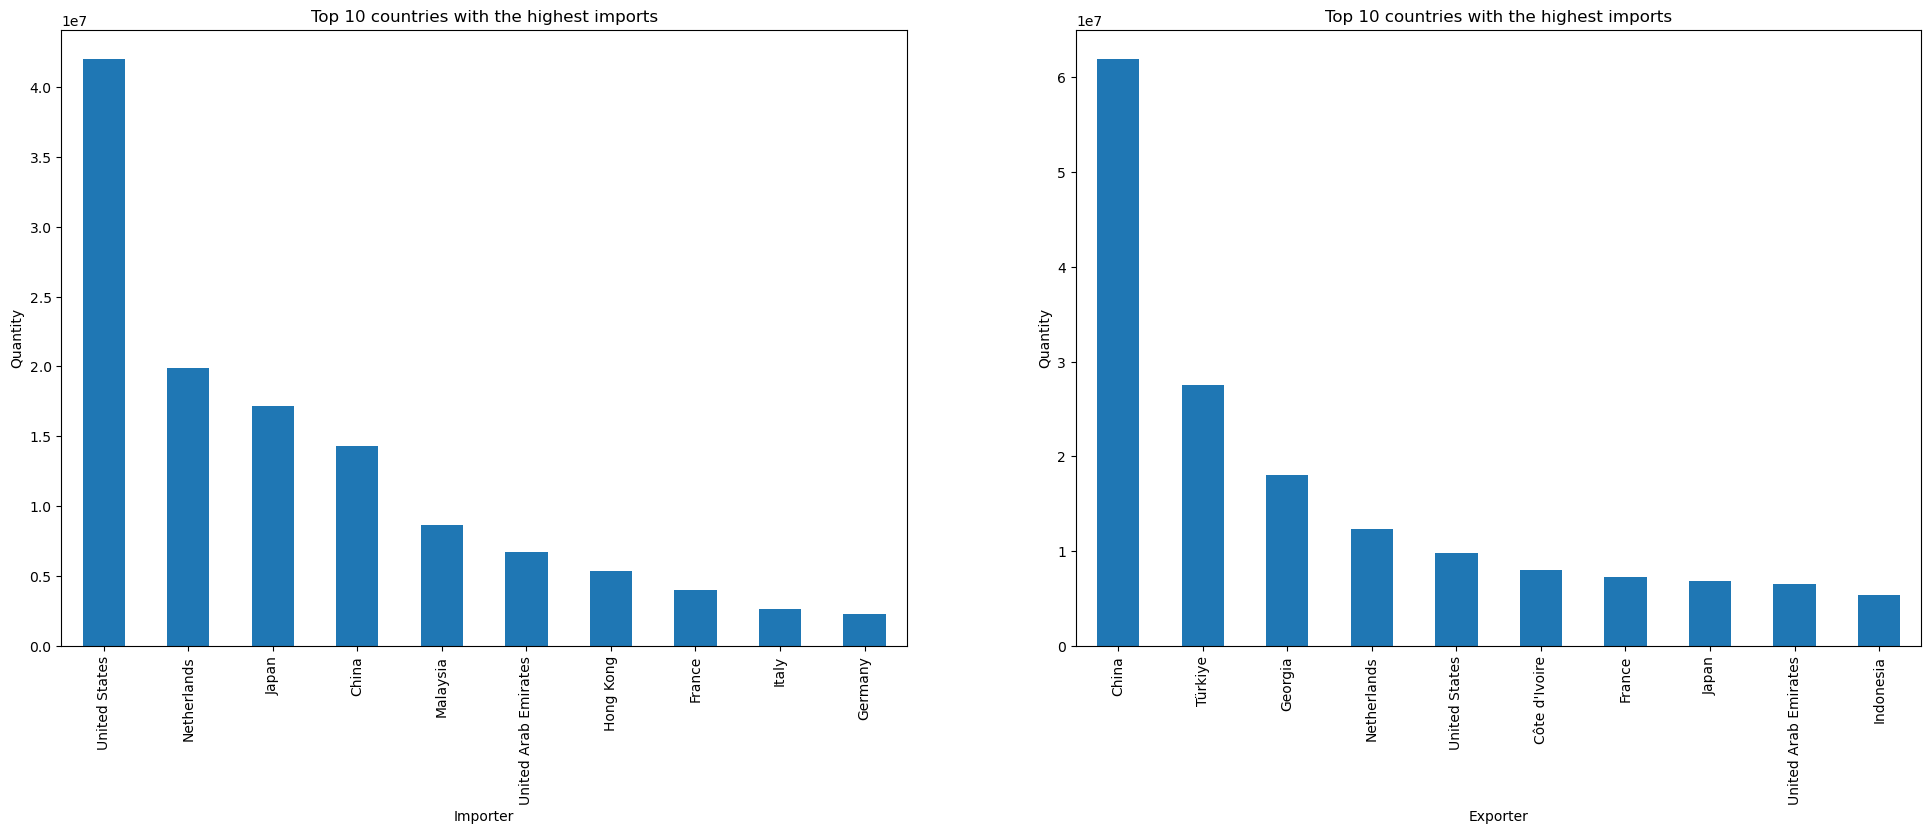

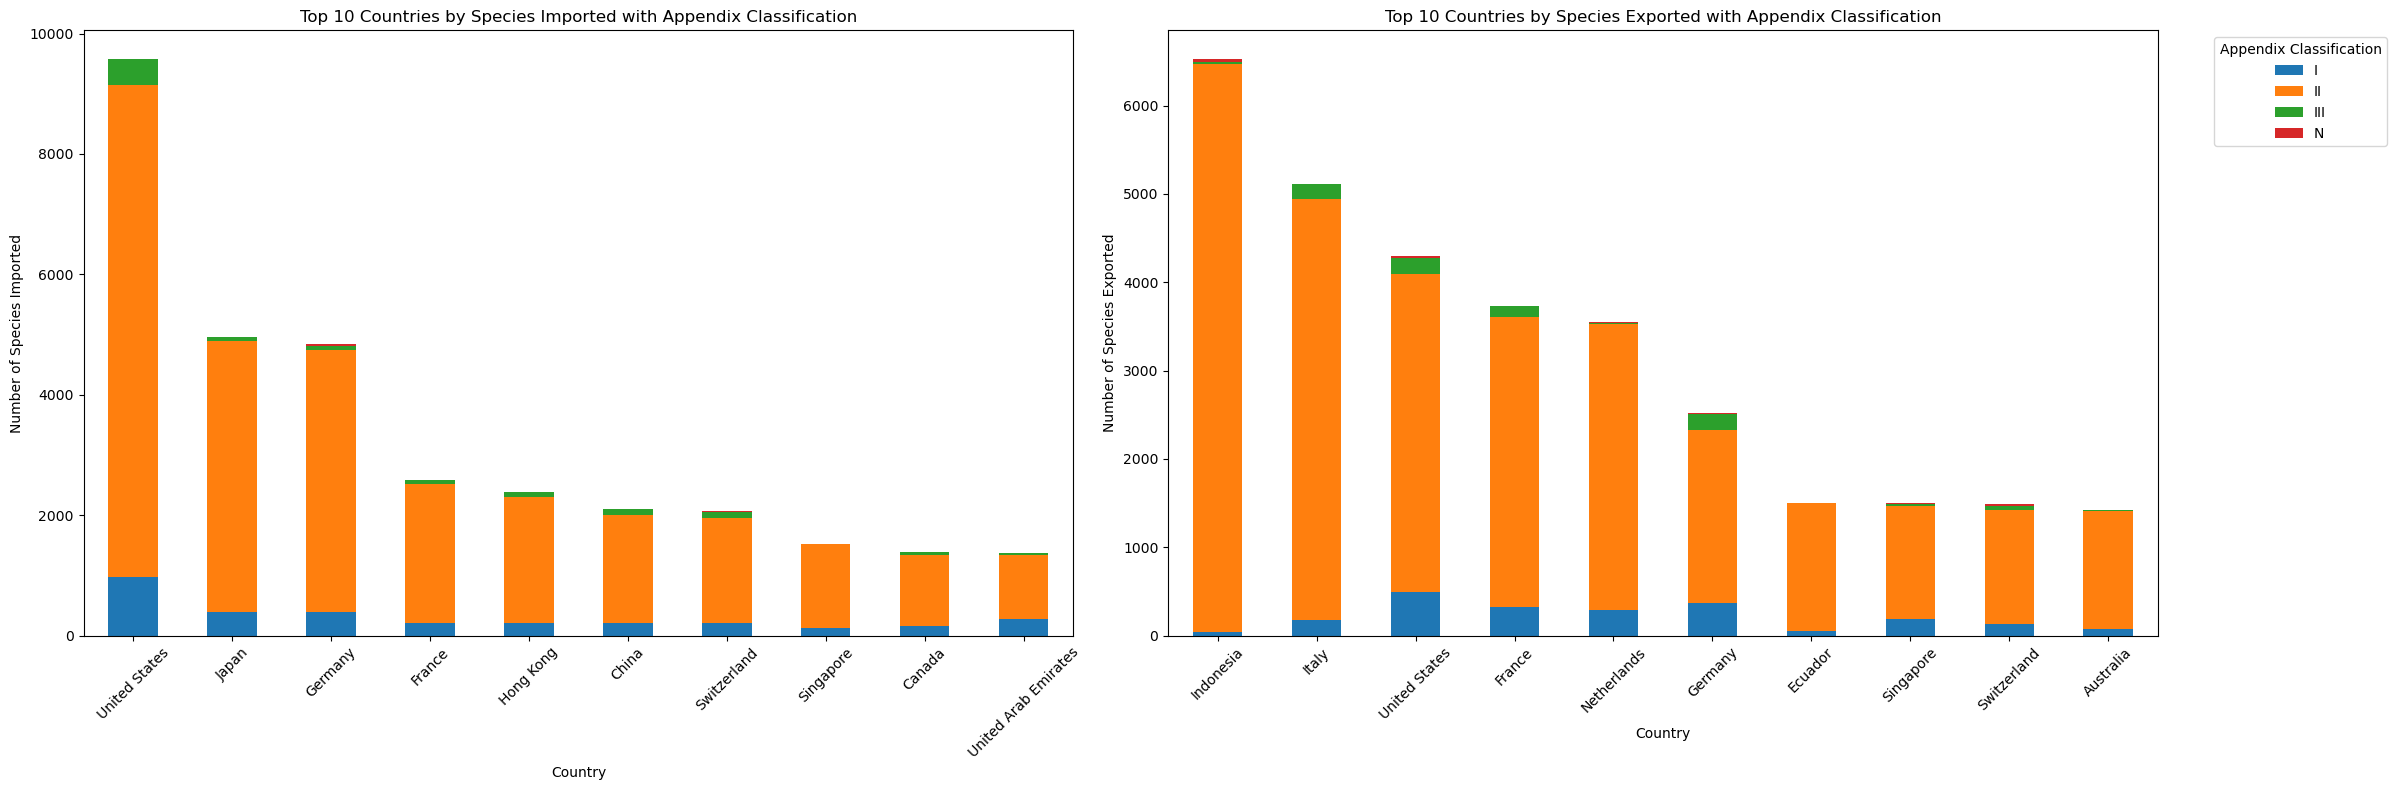

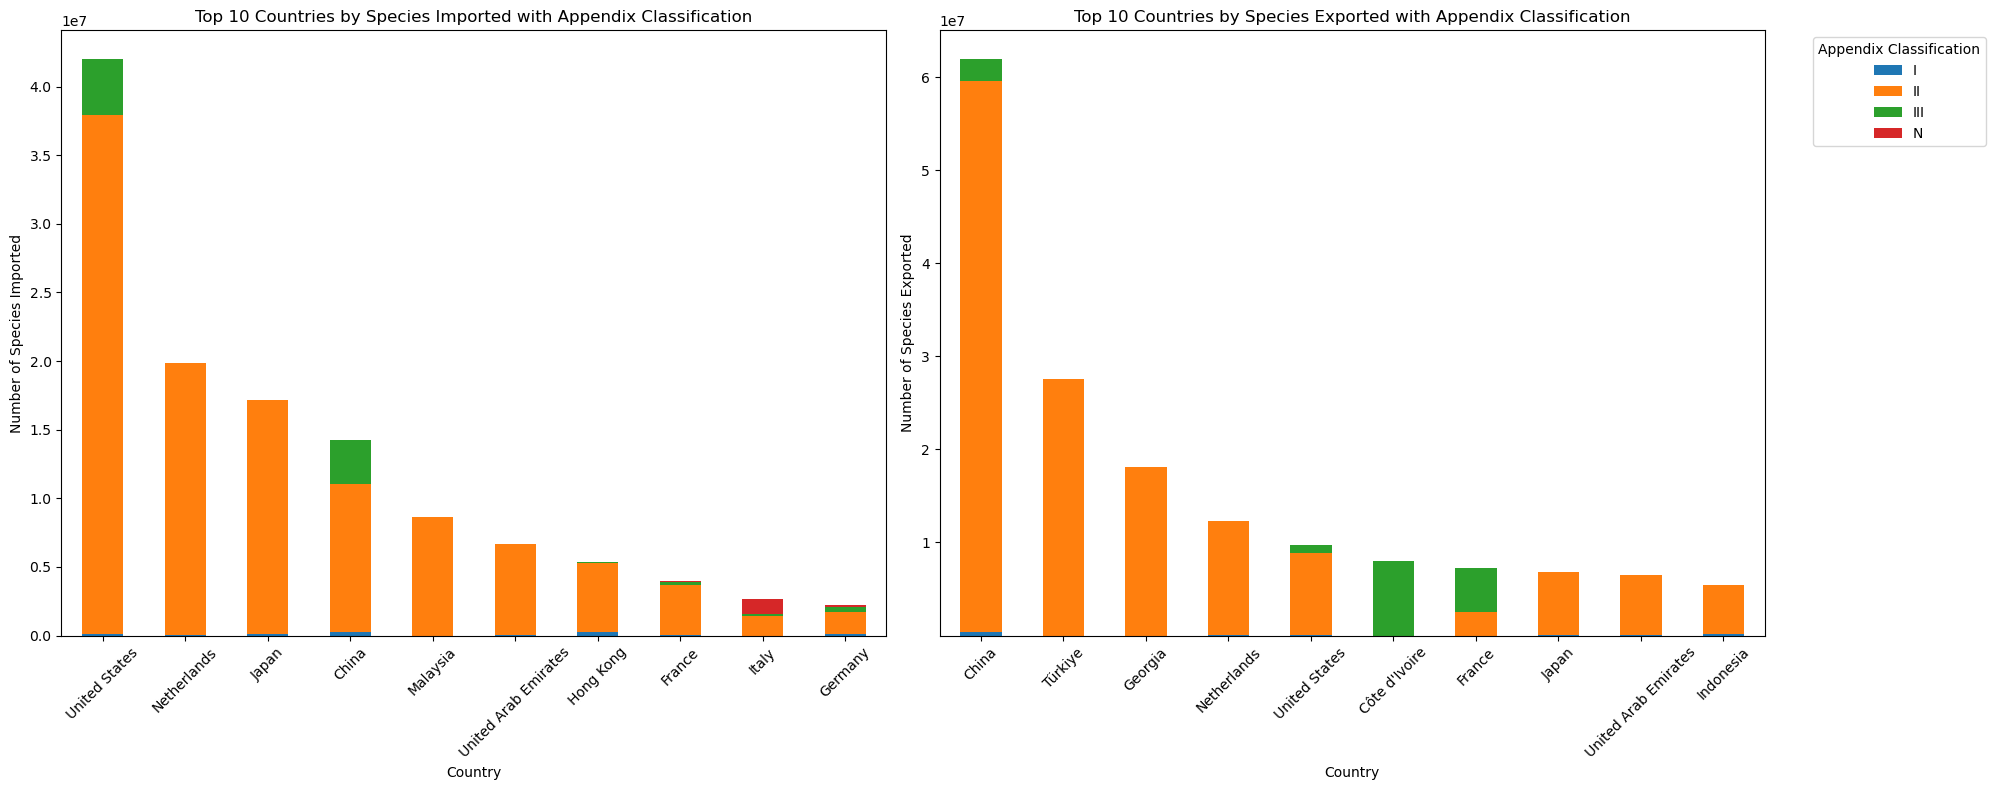

In [141]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(24, 8))

df_grouped = df.groupby('Importer')['Importer reported quantity'].sum()
df_grouped = df_grouped.sort_values(ascending=False)


# plot the top 10 countries with the highest imports
df_grouped.head(10).plot(kind='bar', ax=axes[0])
axes[0].set_ylabel('Quantity')
axes[0].set_title('Top 10 countries with the highest imports')


df_grouped = df.groupby('Exporter')['Exporter reported quantity'].sum()
df_grouped = df_grouped.sort_values(ascending=False)

# plot the top 10 countries with the highest imports
df_grouped.head(10).plot(kind='bar', ax=axes[1])
axes[1].set_ylabel('Quantity')
axes[1].set_title('Top 10 countries with the highest imports')


# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

# Step 1: Aggregate the data for Importers
df_grouped_importers = df.groupby(['Importer', 'App.']).size().unstack(fill_value=0)

# Step 2: Select the top 10 importing countries
df_grouped_importers['Total'] = df_grouped_importers.sum(axis=1)
df_top_10_importers = df_grouped_importers.nlargest(10, 'Total').drop(columns='Total')

# Step 3: Create a stacked bar plot for importers
df_top_10_importers.plot(kind='bar', stacked=True, ax=axes[0])

# Customize the importers plot
axes[0].set_title('Top 10 Countries by Species Imported with Appendix Classification')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Number of Species Imported')
axes[0].legend().remove()
axes[0].tick_params(axis='x', rotation=45)

# Step 4: Aggregate the data for Exporters
df_grouped_exporters = df.groupby(['Exporter', 'App.']).size().unstack(fill_value=0)

# Step 5: Select the top 10 exporting countries
df_grouped_exporters['Total'] = df_grouped_exporters.sum(axis=1)
df_top_10_exporters = df_grouped_exporters.nlargest(10, 'Total').drop(columns='Total')

# Step 6: Create a stacked bar plot for exporters
df_top_10_exporters.plot(kind='bar', stacked=True, ax=axes[1])

# Customize the exporters plot
axes[1].set_title('Top 10 Countries by Species Exported with Appendix Classification')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Number of Species Exported')
axes[1].legend(title='Appendix Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()



# Step 1: Aggregate the data for Importers
df_grouped_importers = df.groupby(['Importer', 'App.']).size().unstack(fill_value=0)

# Sum the quantity of animals imported for each country and app
df_grouped_importers = df.groupby(['Importer', 'App.'])['Importer reported quantity'].sum().unstack(fill_value=0)

# Sum the total quantity of animals imported by each country
df_grouped_importers['Total'] = df_grouped_importers.sum(axis=1)

# Sort the countries by the total quantity of animals imported
df_grouped_importers = df_grouped_importers.sort_values(by='Total', ascending=False)

# Select the top 10 importing countries
df_top_10_importers = df_grouped_importers.nlargest(10, 'Total').drop(columns='Total')

# Step 1: Aggregate the data for Exporters
df_grouped_exporters = df.groupby(['Exporter', 'App.']).size().unstack(fill_value=0)

# Sum the quantity of animals exported for each country and app
df_grouped_exporters = df.groupby(['Exporter', 'App.'])['Exporter reported quantity'].sum().unstack(fill_value=0)

# Sum the total quantity of animals exported by each country
df_grouped_exporters['Total'] = df_grouped_exporters.sum(axis=1)

# Sort the countries by the total quantity of animals exported
df_grouped_exporters = df_grouped_exporters.sort_values(by='Total', ascending=False)

# Select the top 10 exporting countries
df_top_10_exporters = df_grouped_exporters.nlargest(10, 'Total').drop(columns='Total')

# Step 2: Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Step 3: Plot the top 10 importers
df_top_10_importers.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Top 10 Countries by Species Imported with Appendix Classification')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Number of Species Imported')
axes[0].legend().remove()
axes[0].tick_params(axis='x', rotation=45)

# Step 4: Plot the top 10 exporters
df_top_10_exporters.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Top 10 Countries by Species Exported with Appendix Classification')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Number of Species Exported')
axes[1].legend(title='Appendix Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


# Focus and Understanding

So far in this project, we have started to understand what this data is and what we want to look into. I want to focus the ideas of this project down in the next stage. First, I want to look at the most endangered animals because they will be the most at risk. I also want to examine specific animals or countries that have poor practices in trade. This section contains more focused ideas that might need explaining themselves. Look at the markdowns below each graph for explanations.

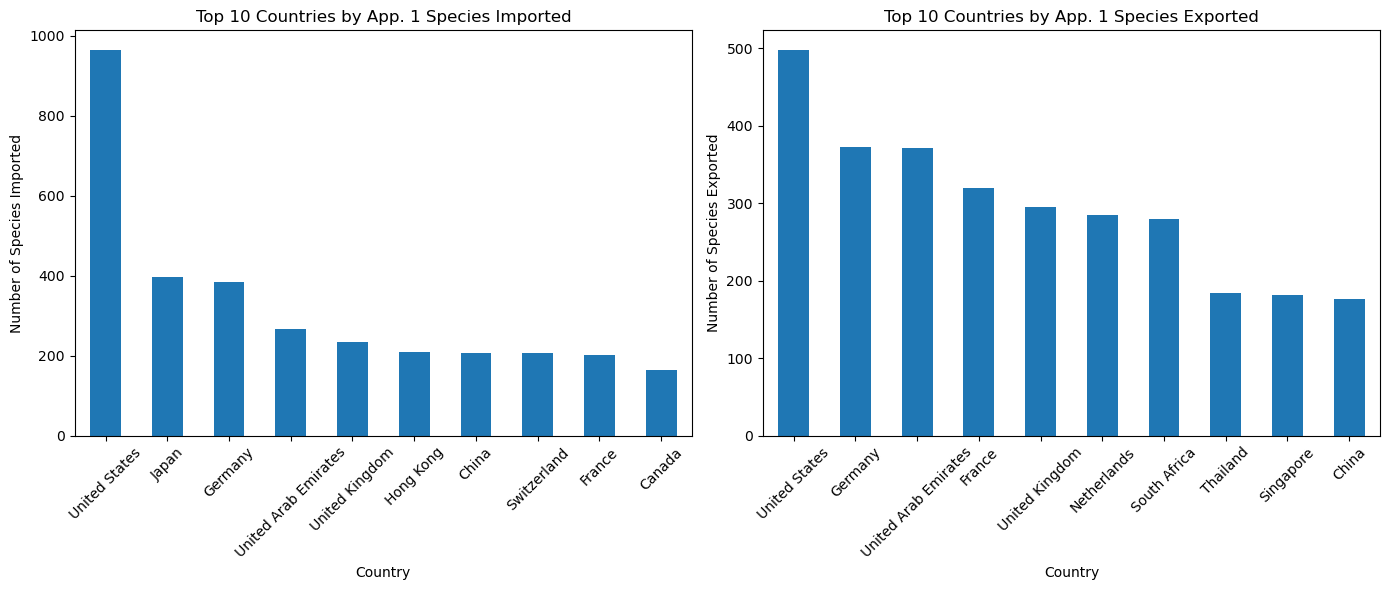

In [142]:
import matplotlib.pyplot as plt

# Step 1: Aggregate the data for Importers (App I species)
df_grouped_importers = df.groupby(['Importer', 'App.']).size().unstack(fill_value=0)
df_grouped_app1_importers = df_grouped_importers['I']
top_importers_app1 = df_grouped_app1_importers.nlargest(10)

# Step 2: Aggregate the data for Exporters (App I species)
df_grouped_exporters = df.groupby(['Exporter', 'App.']).size().unstack(fill_value=0)
df_grouped_app1_exporters = df_grouped_exporters['I']
top_exporters_app1 = df_grouped_app1_exporters.nlargest(10)

# Create subplots for the bar graphs
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Top 10 countries with the highest number of App. 1 species imported
top_importers_app1.plot(kind='bar', ax=axes[0])
axes[0].set_title('Top 10 Countries by App. 1 Species Imported')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Number of Species Imported')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Top 10 countries with the highest number of App. 1 species exported
top_exporters_app1.plot(kind='bar', ax=axes[1])
axes[1].set_title('Top 10 Countries by App. 1 Species Exported')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Number of Species Exported')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()




I knew I wanted to focus on the US in this project, but showing that the US imports and exports the highest number of Appendix I classified animals proves that we may be having poor practices.

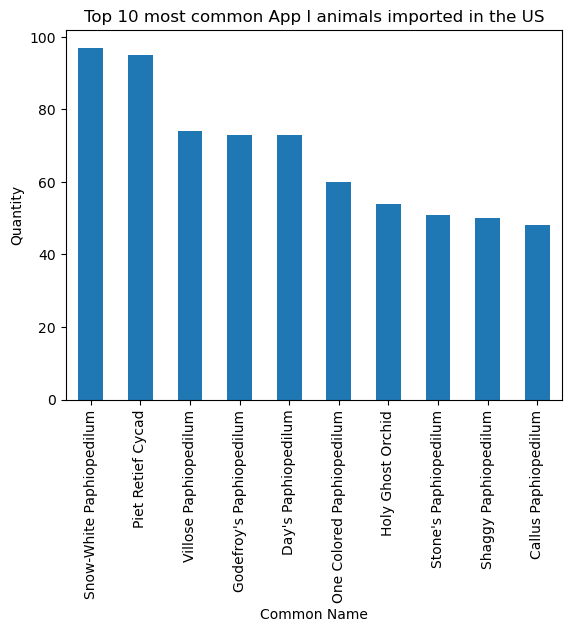

In [143]:
df_us = df_us[df_us['Common Name'] != 'No common name found']
df_us = df_us[df_us['Common Name'] != 'No results found']
#group all the animals by their common name and sum the quantity of animals imported
df_grouped = df_us.groupby('Common Name')['Importer reported quantity'].sum()
df_grouped = df_grouped.sort_values(ascending=False)   


df_grouped.head(10).plot(kind='bar')
plt.ylabel('Quantity')
plt.title('Top 10 most common App I animals imported in the US')
plt.show()

plt.show()


This graph was used to look at the most common animals in common name format that were imported to the US. This doesn’t show much, but it helped to use and understand the common names column. The common names wasnt used too often

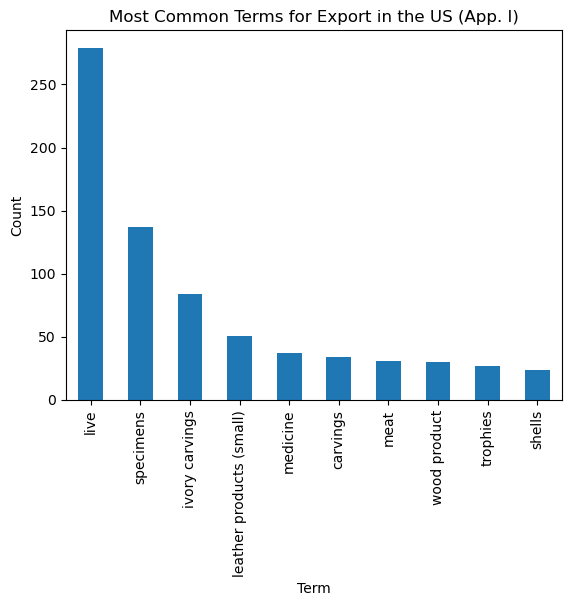

In [144]:
# Filter the data for the US
df_us = df[(df['Importer'] == 'United States') & (df['App.'] == 'I')]
# Get the value counts of the 'Term' column
term_counts = df_us['Term'].value_counts().head(10)

# Plot the value counts
term_counts.plot(kind='bar')

# Set the plot title and labels
plt.title('Most Common Terms for Export in the US (App. I)')
plt.xlabel('Term')
plt.ylabel('Count')

# Show the plot
plt.show()


The term column shows what part of the animal was being exported or imported. It shows that live animals are normally being shipped, but if we’re looking at specific animals, it’s useful to have this template and just select only the animals we have. The ivory carvings are shocking and sad because the ivory trade is notoriously bad, and to see so many being shipped isn’t a good sign that the ivory trade business is small or non-existent.

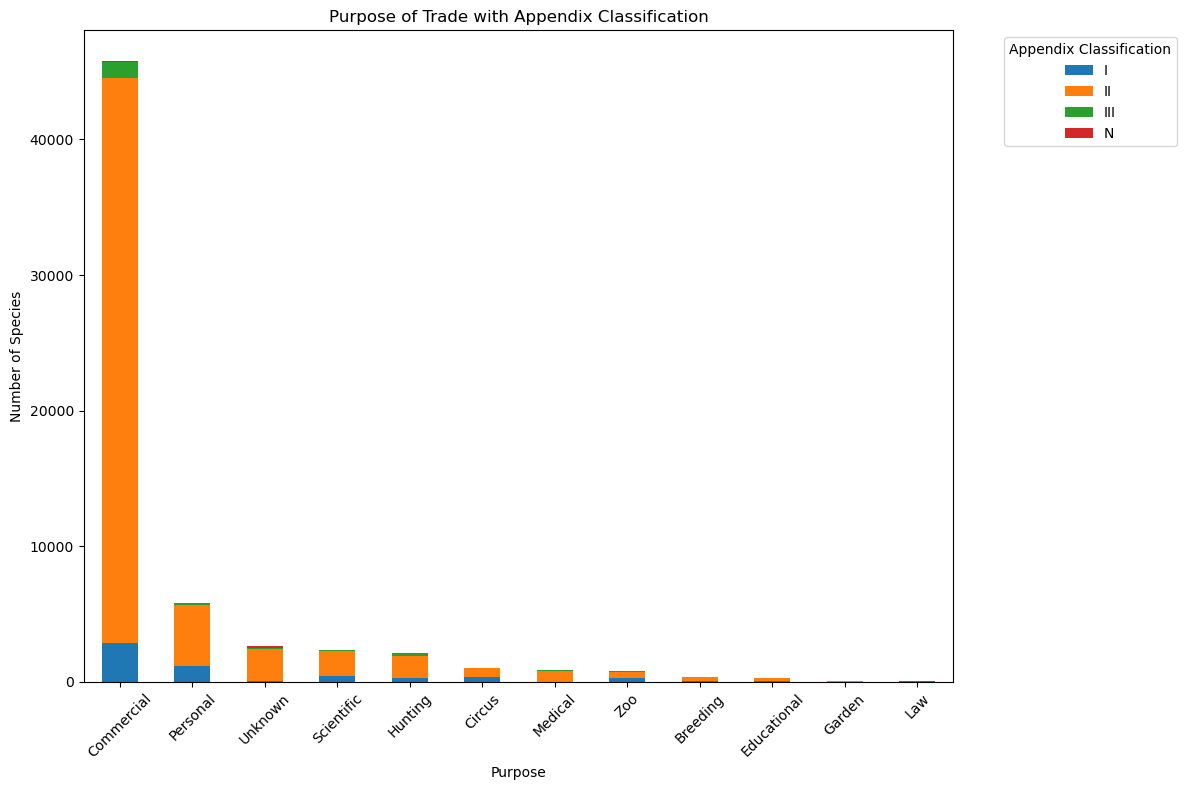

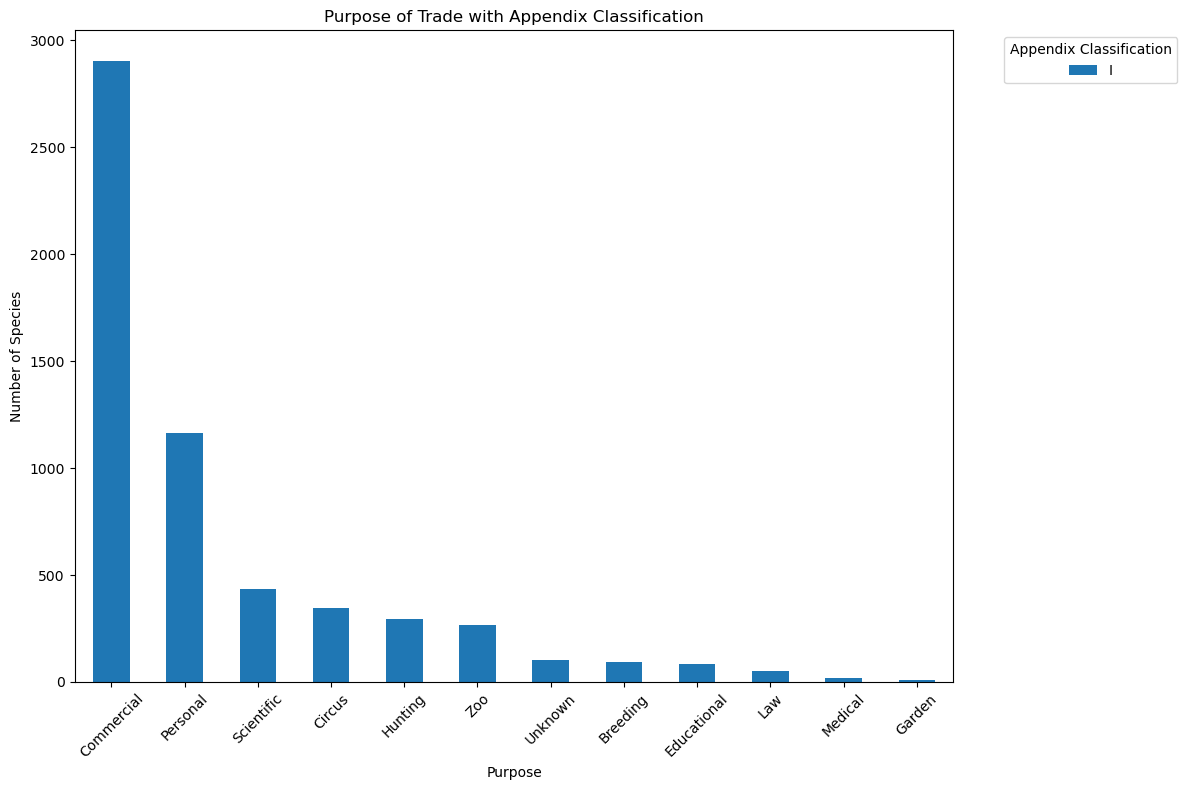

In [145]:
# a stacked bar graph of the purpose with the app of he prouoses as the section of the stacked bar
df_grouped = df.groupby(['Purpose', 'App.']).size().unstack(fill_value=0)

#sort the data by total number of speices in each purpose 
df_grouped['Total'] = df_grouped.sum(axis=1)
df_grouped = df_grouped.sort_values(by='Total', ascending=False)
df_grouped = df_grouped.drop(columns='Total')


df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Purpose of Trade with Appendix Classification')
plt.xlabel('Purpose')
plt.ylabel('Number of Species')
plt.legend(title='Appendix Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

df_grouped = df[df['App.'] == 'I'].groupby(['Purpose', 'App.']).size().unstack(fill_value=0)

#sort the data by total number of speices in each purpose
df_grouped['Total'] = df_grouped.sum(axis=1)
df_grouped = df_grouped.sort_values(by='Total', ascending=False)
df_grouped = df_grouped.drop(columns='Total')

df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Purpose of Trade with Appendix Classification')
plt.xlabel('Purpose')
plt.ylabel('Number of Species')
plt.legend(title='Appendix Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

These might have been the most sad and important graphs by far, and I think you should take time to look at them. They show the use of these imports, and as we can see, it’s not for scientific research. Most of these endangered animals are being used and sold for profits to companies and personal buyers.

In [146]:
import plotly.express as px

#group and sort the data by the amount in each trade purpose
animal_purpose_counts = df_us.groupby(['Genus', 'Purpose']).size().reset_index(name='Count')
animal_purpose_counts = animal_purpose_counts.sort_values(by='Count', ascending=False)

# Create the interactive bar chart sorted by the amount in each term 
fig = px.bar(
    animal_purpose_counts,
    x='Purpose',
    y='Count',
    color='Genus',
    title='Distribution of Genus by Trade Purpose for US Imports',
    labels={'Purpose': 'Purpose of Trade', 'Count': 'Number of Animals', 'Genus': 'Genus'},
    hover_data=['Genus'],
    barmode='stack'

)

# Update layout to make it more informative
fig.update_layout(
    xaxis_title="Purpose of Trade",
    yaxis_title="Number of Animals",
    legend_title="Genus Name",
    barmode='stack'
)

# Show the plot
fig.show()

I know this isn’t one of my best graphs, but I wanted to make an interactive graph and came up with this. There are too many genus types to really investigate, but it is interesting to see that the scientific community has a lot of focus on what animals they study, and the circus only focuses on the 'classic' circus animals

c:\Users\samut\anaconda3\envs\Data_vis_environment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\samut\anaconda3\envs\Data_vis_environment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



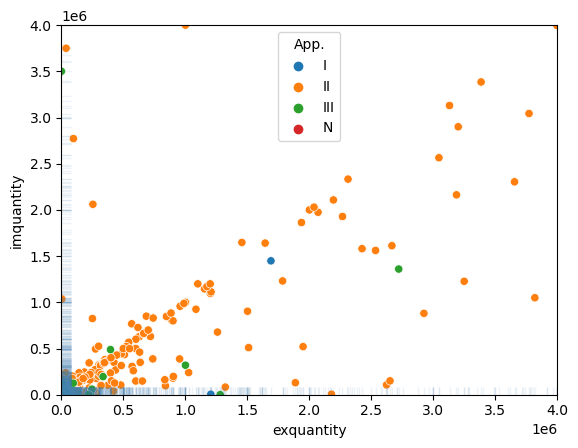

In [147]:
import seaborn as sns

#I used some found code and translateded it into phython

df['exquantity'] = df.apply(
    lambda row: row['Exporter reported quantity'] * 1000 if row['Unit'] in ['kg', 'L', 'l'] else row['Exporter reported quantity'],
    axis=1
)

# Convert Importer reported quantity
df['imquantity'] = df.apply(
    lambda row: row['Importer reported quantity'] * 1000 if row['Unit'] in ['kg', 'L', 'l'] else row['Importer reported quantity'],
    axis=1
)

# Create the scatter plot
sns.scatterplot(data=df, x='exquantity', y='imquantity', hue='App.', palette='tab10')
plt.xlim(0, 4000000)
plt.ylim(0, 4000000)

# Add rug plot (marginal ticks) to the plot
sns.rugplot(x=df['exquantity'], color="steelblue", alpha=0.1, height=0.02)
sns.rugplot(y=df['imquantity'], color="steelblue", alpha=0.1, height=0.02)

# Show the plot
plt.show()

As it says in the pseudocode, this was translated into Python from another project found on Kaggle. I do think it’s very interesting, though not my idea. This graph shows the exporter quantity and importer quantity. When the exporters send off the shipment, they note how many animals, feathers, tusks, or teeth are in the box, but inevitably, some will be broken, lost, or stolen. This graph shows that there are several instances where a large portion of the shipment doesn’t make it. You would expect that if everything stays intact, the graph would be linear. If some animals die, you would just have a few dots below the y=x line, but you can see several instances where large portions of the cargo go missing. I think this is likely due to theft and death due to poor living conditions.

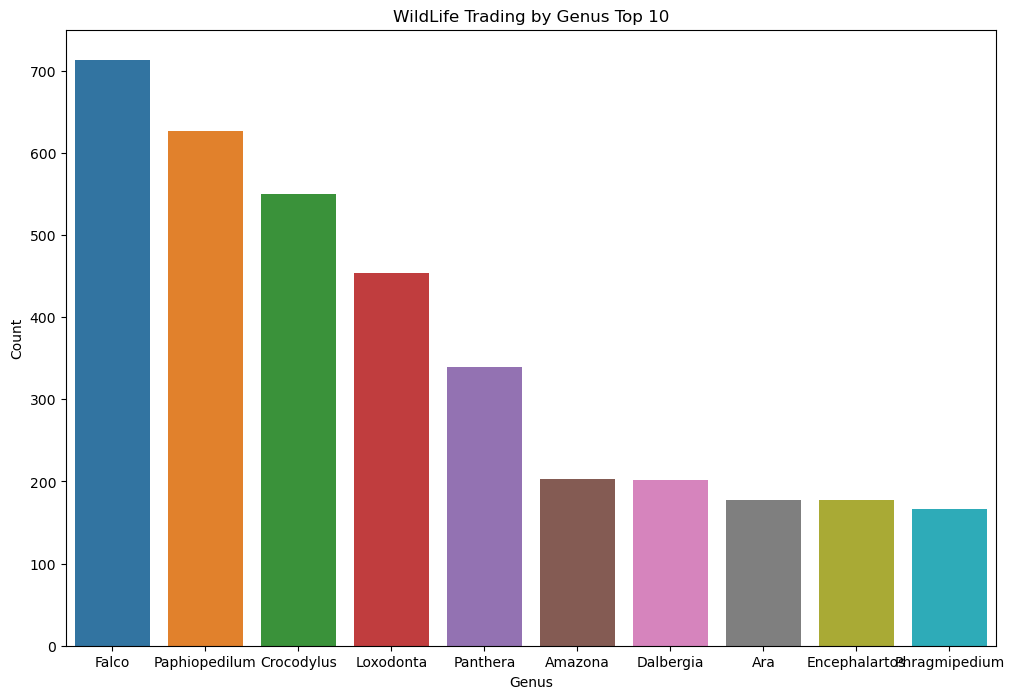

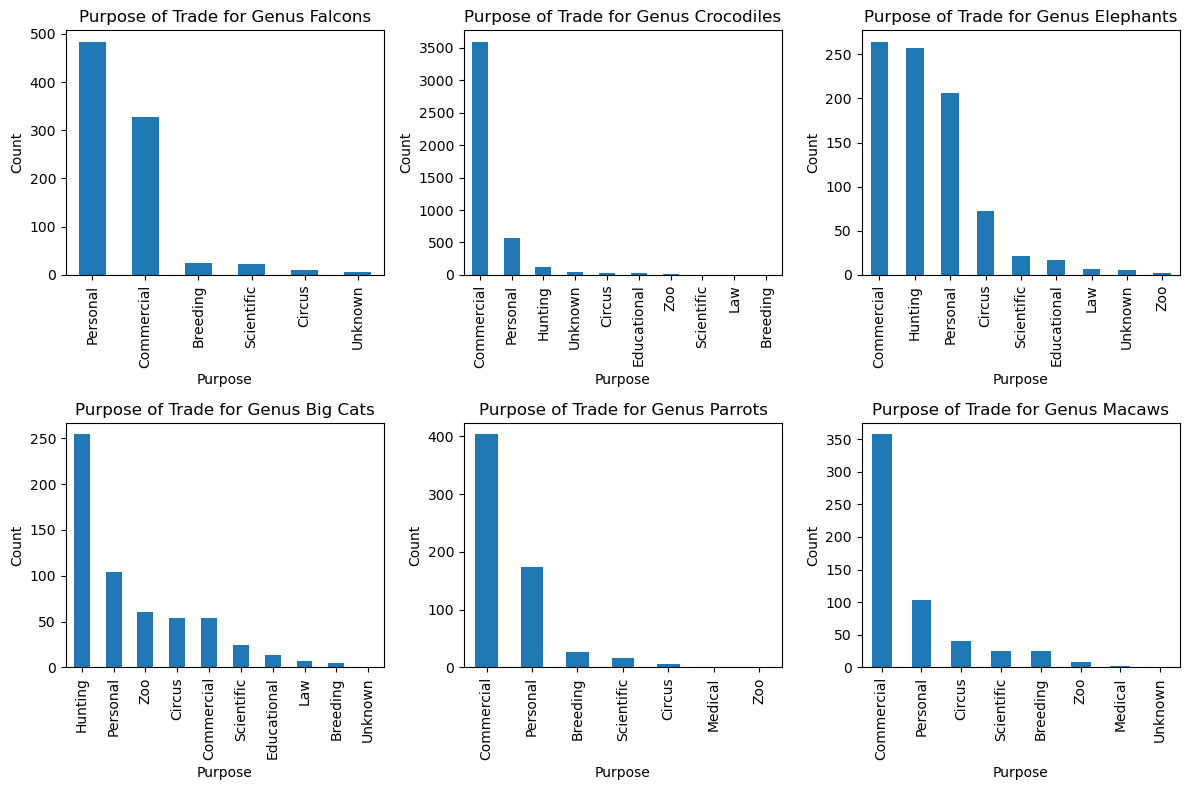

In [148]:
# 1. Create a new column 'allq' as the sum of 'exquantity' and 'imquantity'
df['allq'] = df[['exquantity', 'imquantity']].sum(axis=1)

# 2. Filter the data to include only rows where 'App.' is 'I'
pro = df[df['App.'] == 'I']

# 3. Filter out rows where 'Genus' is NaN or empty
pro = pro.dropna(subset=['Genus'])
pro = pro[pro['Genus'] != " "]

# 4. Group by 'Genus' and calculate sum and count
mf2p1 = pro.groupby('Genus').agg(a1=('allq', 'sum'), count=('allq', 'size')).reset_index()

# 5. Filter out rows where count is exactly 384 and where count is less than or equal to 160
mf2p2 = mf2p1[mf2p1['count'] != 384]
mf2p3 = mf2p2[mf2p2['count'] > 160]

# 6. Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Genus', y='count', data=mf2p3, order=mf2p3.sort_values('count', ascending=False)['Genus'])

# 7. Customize the plot
plt.xticks()
plt.xlabel('Genus')
plt.ylabel('Count')
plt.title('WildLife Trading by Genus Top 10')
plt.ylim(0, 750)
plt.gca().set_facecolor('white')
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

genus_list = ['Falco', 'Crocodylus', 'Loxodonta', 'Panthera', 'Amazona', 'Ara']
genus_list_common_names = ['Falcons', 'Crocodiles', 'Elephants', 'Big Cats', 'Parrots', 'Macaws']

for i, genus in enumerate(genus_list): 
    row = i // 3 
    col = i % 3
    df_falco = df[df['Genus'] == genus]
    ax = axes[row, col]
    df_falco['Purpose'].value_counts().plot(kind='bar', ax=ax)

    ax.set_ylabel('Count')
    ax.set_title(f'Purpose of Trade for Genus {genus_list_common_names [i]}')
plt.tight_layout()
plt.show()



I really enjoy these graphs because after looking at them, you can pick a genus of animals and look into the problems. The highest category is the Falco genus, which includes falcons. The trade of falcons is highly attributed to rich people buying birds as pets and for hunting. Looking at the graph below, you can see that falcons are the only group with personal use as their highest reason, which is due to private owners buying these animals as pets. Crocodylus has the highest rate for commercial use because fashion companies buy leather to make belts, purses, and shoes. I want to look at the big cats, Panthera genus. These animals have a really high rate for hunting, and I want to investigate the reasons.

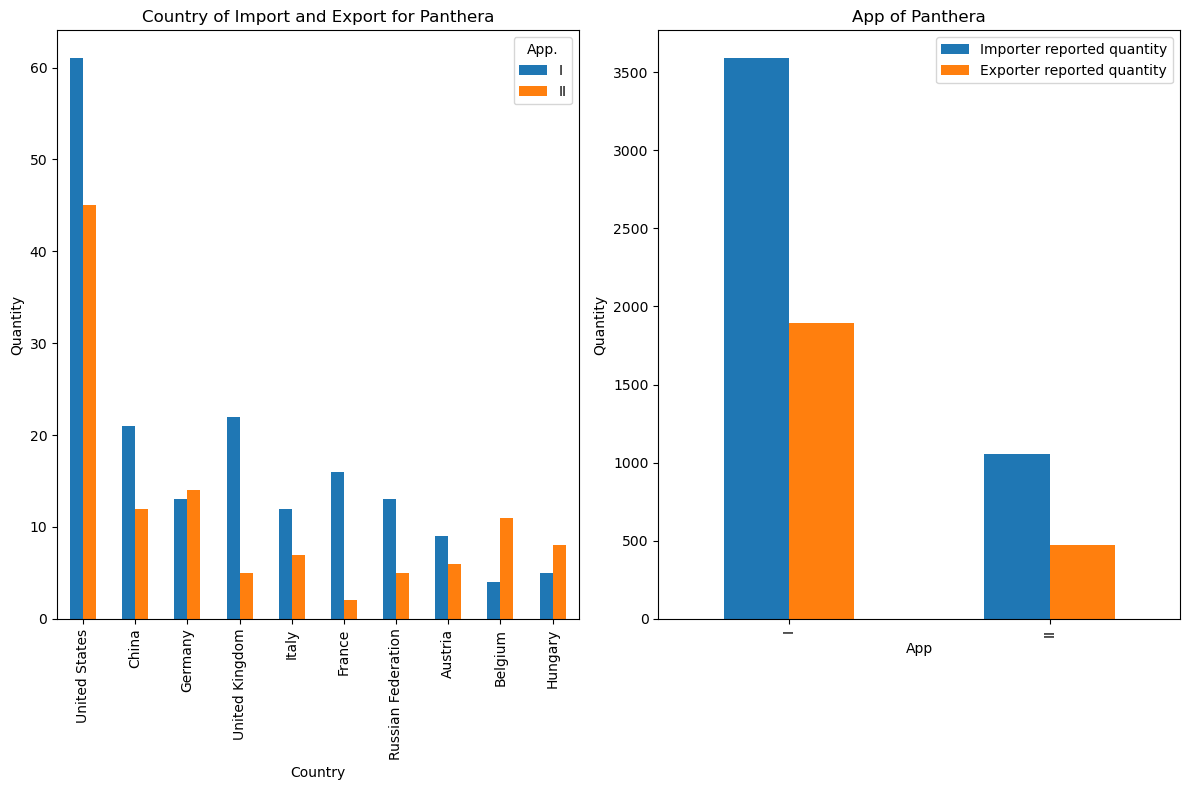

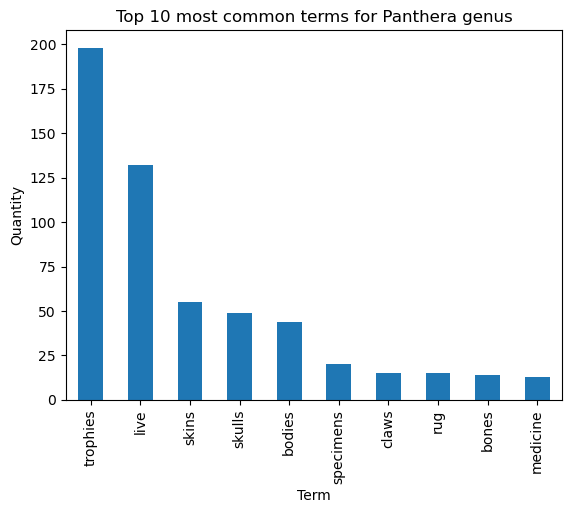

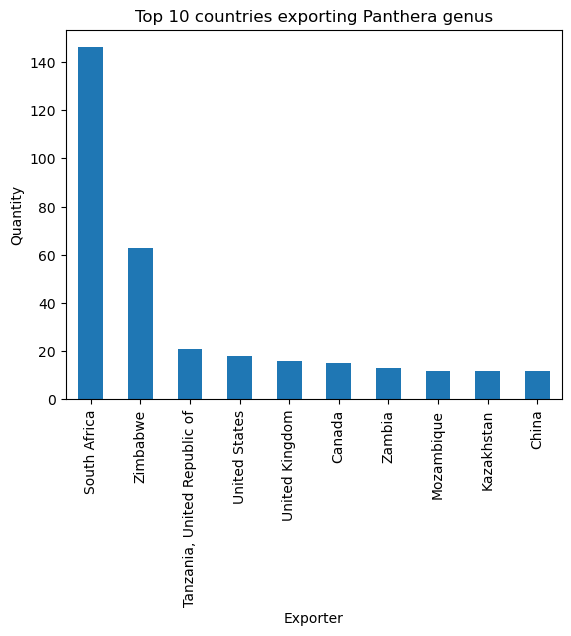

In [149]:
# Step 1: Filter the DataFrame
filtered_df = df[df['Genus'] == 'Panthera']

# Step 2: Group by Importer and Exporter and calculate quantity
grouped_country = filtered_df.groupby(['Importer', 'Exporter']).sum()[['Importer reported quantity', 'Exporter reported quantity']]

# Rank the data and only query the top 10
df_grouped = filtered_df.groupby(['Importer', 'App.']).size().unstack(fill_value=0)
df_grouped['Total'] = df_grouped.sum(axis=1)
df_top_10 = df_grouped.nlargest(10, 'Total').drop(columns='Total')

# Step 3: Group by App. and calculate quantity
grouped_app = filtered_df.groupby('App.').sum()[['Importer reported quantity', 'Exporter reported quantity']]

# Step 4: Create the graph
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
axes = axes.flatten()

# Plot Country of Import and Export
df_top_10.plot(kind='bar', ax=axes[0])
axes[0].set_title('Country of Import and Export for Panthera')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Quantity')

# Plot App of the Animal
grouped_app.plot(kind='bar', ax=axes[1])
axes[1].set_title('App of Panthera')
axes[1].set_xlabel('App')
axes[1].set_ylabel('Quantity')

plt.tight_layout()
plt.show()

#graph waht the most common term of the panthera genus
df_panthera = df[df['Genus'] == 'Panthera']
df_panthera['Term'].value_counts().head(10).plot(kind='bar')
plt.ylabel('Quantity')
plt.title('Top 10 most common terms for Panthera genus')
plt.show()

#where do the panthera genus come from and who exports them

#drop unknown country code
df = df[df['Exporter'] != 'Unknown country code']

df_panthera = df[df['Genus'] == 'Panthera']
df_panthera['Exporter'].value_counts().head(10).plot(kind='bar')
plt.ylabel('Quantity')
plt.title('Top 10 countries exporting Panthera genus')
plt.show()


The above graphs focus on Big cats. It explanes what were wny and who are buying and shipping these animals.

# Conclusion

Tigers, one of the most iconic and endangered species in the world, face significant threats from poaching and illegal trade. South Africa and Zimbabwe are leading exporters of Panthera species, particularly for trophies. These countries often, under the guise of conservation efforts, allow people to hunt big cats for money that is supposedly used for conservation. However, these rates are very high, raising ethical questions. The high demand for trophies could incentivize further hunting, placing additional strain on already endangered species. Trophy hunting perpetuates a demand for animal parts, which can indirectly support illegal poaching activities. Allowing the hunting of endangered animals for trophies sends a contradictory message. While efforts may be made to conserve these species, simultaneously permitting their hunting undermines these efforts.

The practice of trophy hunting, especially for endangered species, is increasingly seen as morally indefensible. The ethical debate hinges on whether the benefits of conservation funding outweigh the moral cost of killing an endangered animal for sport. Many argue that, in a time when biodiversity is under significant threat, any form of hunting that targets endangered species, even under regulated conditions, is ethically indefensible.

### Acknowledgments
The concepts and ideas explored in this project are not limited to the specific case of Panthera or the countries involved in their trade. The methodologies applied here can be extended to analyze the trade of any animal species across different regions. While this project focused on specific, well-known issues, the code and approach remain relevant for broader topics, especially as the conservation status of more species changes, particularly those moving into Appendix I. This allows for further exploration of the sale and the underlying reasons for the trade of other animals.

Given that I was a one-person team, there are certain areas I was unable to fully address. Handling missing data appropriately and the variety of visualizations used were particularly challenging. In this project, missing data was often dropped or ignored, and the visualizations primarily relied on bar graphs. More time and resources would have allowed for a more nuanced approach to data cleaning and a broader range of visual representation.

I also utilized AI tools like ChatGPT and Copilot to assist in various aspects of this work. These tools were invaluable for tasks such as spellchecking, converting large amounts of code to work cohesively, restructuring code, and conducting research.

Finally, I want to extend my gratitude to the CITES Foundation for providing the dataset that was crucial to this project. Their work in monitoring and regulating wildlife trade is essential, and this project would not have been possible without their data.